In [2]:
from __future__ import unicode_literals
import unicodecsv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from random import shuffle

In [5]:
product = pd.read_csv('../data_clean/product.csv', dtype={'MVGR3': str,'MVGR7': str,'DEPT_ID1': str})
product.head()

,MATNR,MAKTX,DEPT_ID1,MVGR1,MVGR2,MVGR3,MVGR4,MVGR5,MVGR6,MVGR7,STY_ID,META_K,EX_CONTENT_ID,EX_UNIMODEL,EX_PORT,EX_STOCK,EX_SALE_PERCENT,EX_RATING_COUNT,EX_RATING,EX_AVG_RATING
0,19047936,PATISIA/ตู้ข้างเตียงNT45/ขาว,1,14,A20,2,70,J9,01,9,14.0,"SB,KONCEPT FURNITURE,Patisia,ชุดห้องนอน,โต๊ะ/ต...",NaN,19047936.0,V,0,30.0,15.0,70.0,4.666667
1,19045101,โซฟาCANNERY/นต.HE51-12/เหลือง-ลายทาง/3S,3,10,059,35,59,B2,32,8,6.0,"SB,SB FURNITURE,Cannery,Sofa Fabric,โซฟา 3 ที่...",NaN,19045101.0,V,-3,25.0,0.0,0.0,0.000000
2,19050282,VPกรอบรูป#HD5937A/ไม้ขัดสี,6,19,,51,B4,,58,23,14.0,"SB,VINTAGE PASSION,,กรอบรูปและภาพแขวน,กรอบรูป,",NaN,19050282.0,V,0,0.0,0.0,0.0,0.000000
3,59000365,Bedroom/Meudon 6'&Isis/Wenge,1,14,598,2,CD,05,D6,9,3.0,"SB,เอส.บี,เฟอร์นิเจอร์,KONCEPT FURNITURE,Meudo...","36,332",59000365.0,C,-24,32.0,0.0,0.0,0.000000
4,59001810,Bedroom/ALicia-E 6'&Meudon/White/Re,1,14,466,2,CD,05,01,9,6.0,"SB,เอส.บี,เฟอร์นิเจอร์,KONCEPT FURNITURE,Alici...",NaN,59001810.0,V,0,32.0,0.0,0.0,0.000000


In [6]:
success_order = pd.read_csv('../data_clean/order_success.csv')
success_order.head()

,ORDER_ID,CUSTOMER_ID,BPCODE,CREATE_DATE,UPDATE_DATE,STATUS
0,2321,4223,1100702550,2015-10-16 15:36:00,2015-10-16 15:42:00,PAID_SUCCESS
1,2481,2509,1100605014,2015-10-18 20:50:00,2015-10-18 20:58:00,PAID_SUCCESS
2,2781,5445,1100703863,2015-10-26 11:22:00,2015-10-26 11:25:00,PAID_SUCCESS
3,3202,8263,1100561933,2015-01-11 16:44:00,2015-01-11 16:46:00,PAID_SUCCESS
4,3962,10702,1100708595,2015-11-11 10:22:00,2015-11-11 10:33:00,PAID_SUCCESS


# ใครคือสุดยอดแฟนพันธ์แท้ SB 

ใครที่สร้าง order success ขึ้นมาได้มากที่สุด

In [10]:
top5_best_fan = success_order.groupby(['CUSTOMER_ID']).size().sort_values(ascending=False)[0:5]
top5_best_fan

CUSTOMER_ID
2082      15
18462     13
216302    11
197902    10
97822      9
dtype: int64

# =========== Users Code ===========

In [38]:
users = pd.read_csv('../data_20180120/customer.csv').fillna('')
users.head()

/Users/pawarisson/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CUSTOMER_ID,FIRST_NAME,IS_DESIGNER,BPCODE,ADDRESS_NO,ADDRESS_POSTAL_CODE,ADDRESS_PROVINCE_ID,ADDRESS_PROVINCE,ADDRESS_STREET,ADDRESS_DISTRICT_ID,ADDRESS_DISTRICT,ADDRESS_SUB_DISTRICT_ID,ADDRESS_SUB_DISTRICT,ADDRESS_TYPE,ADDRESS_BUILDING,ADDRESS_OFFICE_NAME,DATE_OF_BIRTH
0,"2,083",ฐนันทิพย์,N,1100698858,2,20170,4.09e+09,จ.ชลบุรี,เซิดน้อย,4.09457e+09,อ.บ้านบึง,4.09457e+09,ต.บ้านบึง,บ้านพักอาศัย,เอเชีย,Cupcode,1988-10-30
1,"2,102",ทดสอบ002,N,1900036840,,,,,,,,,,,,,
2,"2,223",Ping,N,1900036887,,,,,,,,,,,,,
3,"2,224",มาศสุภา,N,1900036888,,,,,,,,,,,,,
4,"2,284",Tanate,N,1900036922,,,,,,,,,,,,,


In [39]:
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8') 

new_users = users[:]
new_users['CUSTOMER_ID'] = users['CUSTOMER_ID'].apply(locale.atoi)
new_users.head()

,CUSTOMER_ID,FIRST_NAME,IS_DESIGNER,BPCODE,ADDRESS_NO,ADDRESS_POSTAL_CODE,ADDRESS_PROVINCE_ID,ADDRESS_PROVINCE,ADDRESS_STREET,ADDRESS_DISTRICT_ID,ADDRESS_DISTRICT,ADDRESS_SUB_DISTRICT_ID,ADDRESS_SUB_DISTRICT,ADDRESS_TYPE,ADDRESS_BUILDING,ADDRESS_OFFICE_NAME,DATE_OF_BIRTH
0,2083,ฐนันทิพย์,N,1100698858,2,20170,4.09e+09,จ.ชลบุรี,เซิดน้อย,4.09457e+09,อ.บ้านบึง,4.09457e+09,ต.บ้านบึง,บ้านพักอาศัย,เอเชีย,Cupcode,1988-10-30
1,2102,ทดสอบ002,N,1900036840,,,,,,,,,,,,,
2,2223,Ping,N,1900036887,,,,,,,,,,,,,
3,2224,มาศสุภา,N,1900036888,,,,,,,,,,,,,
4,2284,Tanate,N,1900036922,,,,,,,,,,,,,


In [40]:
set(top5_best_fan.keys())

{2082, 18462, 97822, 197902, 216302}

In [41]:
def checkCustomer(cust_id):
    if cust_id in set(top5_best_fan.keys()):
        return True
    else:
        return False

In [42]:
checkCustomer(2082)

True

In [43]:
index_of_top5 = new_users['CUSTOMER_ID'].apply(checkCustomer)
top5_data = new_users[index_of_top5]
top5_data

,CUSTOMER_ID,FIRST_NAME,IS_DESIGNER,BPCODE,ADDRESS_NO,ADDRESS_POSTAL_CODE,ADDRESS_PROVINCE_ID,ADDRESS_PROVINCE,ADDRESS_STREET,ADDRESS_DISTRICT_ID,ADDRESS_DISTRICT,ADDRESS_SUB_DISTRICT_ID,ADDRESS_SUB_DISTRICT,ADDRESS_TYPE,ADDRESS_BUILDING,ADDRESS_OFFICE_NAME,DATE_OF_BIRTH
26,2082,ปิยมาศ,N,1100500779,8,11120,1.24e+09,จ.นนทบุรี,-,1.24504e+09,ต.ปากเกร็ด,1.24504e+09,อ.ปากเกร็ด,บ้านพักอาศัย,หมู่1,-,1976-10-23
6283,18462,ปาริฉัตร,N,1100718241,807 Moo 8,57130,6.13e+09,จ.เชียงราย,Payang,6.13698e+09,ต.แม่สาย,6.13698e+09,อ.แม่สาย,HOUSE,,Fatfree Bicycle Shop,1968-1-2
19665,97822,จิราภรณ์,N,1100815868,244 หมู่ 12,90180,5.57e+09,จ.สงขลา,ไม่มีชื่อถนนค่ะ,5.57715e+09,ต.คูหาใต้,5.57715e+09,อ.รัตภูมิ,บ้านพักอาศัย,,,1979-07-8
31583,216302,ชัยณรงค์,N,1100890793,521/219,10510,1.01e+09,กรุงเทพมหานคร,ถนนหทัยราษฎร์,1.01084e+09,เขตคลองสามวา,9e+10,แขวงสามวาตะวันตก,บ้านพักอาศัย,,หมู่บ้านพฤกลดา วงแหวน-หทัยราษฎร์,1981-05-1
32538,197902,Onanong,N,1100884598,119/1147 หมู่บ้านเพอร์เฟคเพลส ต.ไทรม้า อำเภอเมือง,,,,ถนนรัตนาธิเบศร์,,,,,บ้านพักอาศัย,,,1970-09-3


# คนกลุ่มไหนจ่ายหนักสุด

ข้อมูลที่อยู่ในช่วง +- 3 SD

In [75]:
users_age = pd.read_csv('../data_clean/customer_age.csv')
print(len(users_age))
users_age.head()

10065


,CUSTOMER_ID,Age
0,2083,29.306849
1,2390,31.528767
2,2406,34.367123
3,2412,28.320548
4,2413,35.717808


In [50]:
print(max(users_age['Age']))
print(min(users_age['Age']))

59.7424657534
15.2273972603


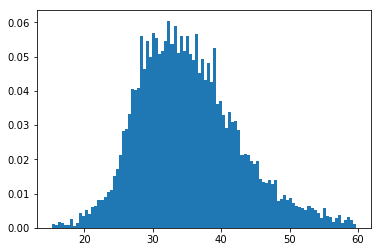

In [53]:
import numpy as np
import scipy.stats as stats
import pylab as pl
import seaborn as sns

pl.hist(users_age['Age'],normed=True, bins=100)  
pl.show()

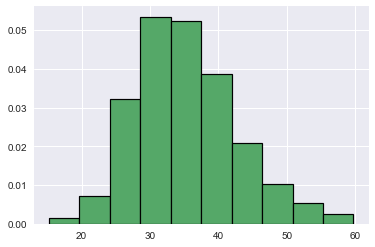

In [69]:
sns.set()
pl.hist(users_age['Age'],normed=True, bins=10,edgecolor='black', linewidth=1.2)  
pl.show()

แบ่งคนเป็น 10 กลุ่ม

In [72]:
n, bins, patches = pl.hist(users_age['Age'], 10)
print(n)
print(bins)
print(patches)

[   70.   321.  1440.  2395.  2350.  1733.   938.   464.   241.   113.]
[ 15.22739726  19.67890411  24.13041096  28.58191781  33.03342466
  37.48493151  41.93643836  46.38794521  50.83945205  55.2909589
  59.74246575]
<a list of 10 Patch objects>


In [73]:
def divideGroup(age):
    if age >= bins[0] and age < bins[1]:
        return 1
    elif age >= bins[1] and age < bins[2]:
        return 2
    elif age >= bins[2] and age < bins[3]:
        return 3
    elif age >= bins[3] and age < bins[4]:
        return 4
    elif age >= bins[4] and age < bins[5]:
        return 5
    elif age >= bins[5] and age < bins[6]:
        return 6
    elif age >= bins[6] and age < bins[7]:
        return 7
    elif age >= bins[7] and age < bins[8]:
        return 8
    elif age >= bins[8] and age < bins[9]:
        return 9
    elif age >= bins[9] and age < bins[10]:
        return 10
    else:
        return 11

In [76]:
user_group = users_age[:]
user_group['Group'] = users_age['Age'].apply(divideGroup)
user_group.head()

/Users/pawarisson/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,CUSTOMER_ID,Age,Group
0,2083,29.306849,4
1,2390,31.528767,4
2,2406,34.367123,5
3,2412,28.320548,3
4,2413,35.717808,5


In [84]:
def checkGroup(group,number):
    if group == number:
        return True
    else:
        return False

## Group 1

In [86]:
index_group1 = user_group['Group'].apply(checkGroup, number=1)
user_group1 = user_group[index_group1]
print(len(user_group1))
user_group1.head()

70


,CUSTOMER_ID,Age,Group
260,5556,17.600000,1
511,10706,15.243836,1
816,27063,16.394521,1
1413,25568,16.243836,1
1615,27204,19.457534,1


### ดูว่า Group1 Success กี่ order

In [88]:
gr1_success = pd.merge(user_group1,success_order, how='inner', left_on=['CUSTOMER_ID'], right_on =['CUSTOMER_ID'])
len(gr1_success)

19

# Group 2

In [90]:
index_group2 = user_group['Group'].apply(checkGroup, number=2)
user_group2 = user_group[index_group2]
print(len(user_group2))
user_group2.head()

321


,CUSTOMER_ID,Age,Group
9,2316,22.586301,2
12,2085,21.128767,2
28,2365,21.128767,2
39,2664,22.372603,2
54,2462,21.161644,2


In [91]:
gr2_success = pd.merge(user_group2,success_order, how='inner', left_on=['CUSTOMER_ID'], right_on =['CUSTOMER_ID'])
len(gr2_success)

112

# Group 3

In [92]:
index_group3 = user_group['Group'].apply(checkGroup, number=3)
user_group3 = user_group[index_group3]
print(len(user_group3))
user_group3.head()

1440


,CUSTOMER_ID,Age,Group
3,2412,28.320548,3
20,2182,27.720548,3
26,1042,26.917808,3
35,2584,27.202740,3
38,2558,24.178082,3


In [93]:
gr3_success = pd.merge(user_group3,success_order, how='inner', left_on=['CUSTOMER_ID'], right_on =['CUSTOMER_ID'])
len(gr3_success)

499

# Group 4-10

In [95]:
for i in range(1,11):
    print("Group",i)
    index_groupi = user_group['Group'].apply(checkGroup, number=i)
    user_groupi = user_group[index_groupi]
    print("User",len(user_groupi))
    gri_success = pd.merge(user_groupi,success_order, how='inner', left_on=['CUSTOMER_ID'], right_on =['CUSTOMER_ID'])
    print("Success Order",len(gri_success))

Group 1
User 70
Success Order 19
Group 2
User 321
Success Order 112
Group 3
User 1440
Success Order 499
Group 4
User 2395
Success Order 926
Group 5
User 2350
Success Order 898
Group 6
User 1733
Success Order 667
Group 7
User 938
Success Order 311
Group 8
User 464
Success Order 170
Group 9
User 241
Success Order 85
Group 10
User 112
Success Order 36


**Group 4 (28.58191781 - 33.03342466 ปี) สั่งซื้อเยอะสุด**

# คนที่จ่ายหนักสุดอยู่ในพื้นที่ไหน

In [96]:
index_group4 = user_group['Group'].apply(checkGroup, number=4)
user_group4 = user_group[index_group4]
print("User",len(user_group4))
gr4_success = pd.merge(user_group4,success_order, how='inner', left_on=['CUSTOMER_ID'], right_on =['CUSTOMER_ID'])
print("Success Order",len(gr4_success))

User 2395
Success Order 926


In [101]:
def getCustomerData(cust_id):
    if cust_id in set(user_group4['CUSTOMER_ID']):
        return True
    else:
        return False

In [103]:
index_group42 = new_users['CUSTOMER_ID'].apply(getCustomerData)
user_group4_data = new_users[index_group42]

In [105]:
user_group4_data.head()

,CUSTOMER_ID,FIRST_NAME,IS_DESIGNER,BPCODE,ADDRESS_NO,ADDRESS_POSTAL_CODE,ADDRESS_PROVINCE_ID,ADDRESS_PROVINCE,ADDRESS_STREET,ADDRESS_DISTRICT_ID,ADDRESS_DISTRICT,ADDRESS_SUB_DISTRICT_ID,ADDRESS_SUB_DISTRICT,ADDRESS_TYPE,ADDRESS_BUILDING,ADDRESS_OFFICE_NAME,DATE_OF_BIRTH
0,2083,ฐนันทิพย์,N,1100698858,2,20170,4.09e+09,จ.ชลบุรี,เซิดน้อย,4.09457e+09,อ.บ้านบึง,4.09457e+09,ต.บ้านบึง,บ้านพักอาศัย,เอเชีย,Cupcode,1988-10-30
13,2390,ภิญญามาศ,N,1100700539,770/73,10250,1.01e+09,กรุงเทพมหานคร,ถ.พัฒนาการ,1.01123e+09,แขวงสวนหลวง,1.01123e+09,เขตสวนหลวง,HOUSE,หมู่บ้านพาทิโอ,,1986-8-11
27,2142,kanyarat,N,1100810163,152,10140,1.01e+09,กรุงเทพมหานคร,พุทธบูชา,1.01093e+09,เขตทุ่งครุ,1.01093e+09,แขวงบางมด,บ้านพักอาศัย,,,1988-08-10
42,2391,ญาณี,N,1100688593,2/689,11110,1.24e+09,จ.นนทบุรี,ถ.รัตนาธิเบศร์,1.24425e+09,อ.บางบัวทอง,1.24425e+09,ต.บางรักพัฒนา,บ้านพักอาศัย,รัตนาธิเบศร์,,1988-05-20
84,2233,พันทิวา,N,1100465531,74/2,10330,1.01e+09,กรุงเทพมหานคร,1,1.01108e+09,แขวงรองเมือง,1.01108e+09,เขตปทุมวัน,,,,1989-7-4


In [110]:
user_group4_data.groupby('ADDRESS_POSTAL_CODE').size().sort_values(ascending=False).head()

ADDRESS_POSTAL_CODE
10310    86
10250    83
         82
10400    79
10240    76
dtype: int64

In [111]:
user_group4_data.to_csv('../data_clean/most_consume_group.csv',index=False)

# สินค้าอะไรที่คนซื้อผ่าน web เยอะที่สุด

In [114]:
order_item = pd.read_csv('../data_clean/order_item_merge.csv')
order_item.head()

,ORDER_ID,CUSTOMER_ID,BPCODE,CREATE_DATE,UPDATE_DATE,STATUS,ORDER_ITEM_ID,MATNR,QUANTITY,TOTAL_PRICE
0,2024,22,1100700373,2015-05-10 21:05:00,2015-05-10 21:05:00,PENDING,2024,19106665,1,2700.0
1,2024,22,1100700373,2015-05-10 21:05:00,2015-05-10 21:05:00,PENDING,2025,19049635,1,36900.0
2,2241,4122,1100702444,2015-10-15 18:51:00,2015-10-15 19:03:00,PENDING,2221,19086648,1,6900.0
3,2321,4223,1100702550,2015-10-16 15:36:00,2015-10-16 15:42:00,PAID_SUCCESS,2281,19110489,1,7900.0
4,2341,4122,1100702444,2015-10-16 23:45:00,2015-10-16 23:54:00,PENDING,2301,19086648,1,6900.0


In [117]:
order_item.groupby('STATUS').sum()

,ORDER_ID,CUSTOMER_ID,BPCODE,ORDER_ITEM_ID,MATNR,QUANTITY,TOTAL_PRICE
STATUS,,,,,,,
CANCEL,146560810,217791906,1582967833377,137641577,38905441846,1682,1.523420e+07
PAID_FAIL,49517,89666,1100494997,45183,25023254,1,9.900000e+01
PAID_SUCCESS,440497697,698397121,7144114059935,409861652,159545148171,7776,5.864497e+07
PENDING,520871739,779133368,9211245992337,483831271,218899605586,1000011431,1.786004e+14
PENDING_TMN_CREATED,1995173,4261926,354423559645,1905925,8347933478,424,4.553589e+06


In [121]:
order_item.groupby(['STATUS','MATNR']).size().sort_values(ascending=False).head()

STATUS        MATNR   
PENDING       19111578    62
PAID_SUCCESS  19112395    42
PENDING       19112395    40
PAID_SUCCESS  19111578    39
              19084943    39
dtype: int64

### MATNR = 19112395 เป็น Product ที่มีการซื้อมากที่สุดในเว็บ ทั้งหมด 42 ครั้ง

In [129]:
product.iloc[product[product['MATNR'] == 19112395].index[0]]

MATNR                                                       19112395
MAKTX                          URBANI/โต๊ะทำงานDK110/โซลิดโอ๊ค/เทาดำ
DEPT_ID1                                                           8
MVGR1                                                             14
MVGR2                                                            JN7
MVGR3                                                             14
MVGR4                                                             95
MVGR5                                                             L1
MVGR6                                                             E7
MVGR7                                                              9
STY_ID                                                             6
META_K             SB,KONCEPT FURNITURE,Urbani,เฟอร์นิเจอร์สำนักง...
EX_CONTENT_ID                                                  1,207
EX_UNIMODEL                                              1.90772e+07
EX_PORT                           

![](../data_img/19112395.jpg)

# สินค้าสีอะไรที่คนนิยม (ตอบได้ไปแล้วจากส่วนเดี่ยวๆ)

สีขาว เอาวงแหวนนั่นมาตอบ

# คนกลุ่ม 1-10 ชอบสินค้าสีอะไรมากที่สุด

Merge order_item + product

In [137]:
order_with_data = pd.merge(order_item,product, how='left', left_on=['MATNR'], right_on =['MATNR'])
paid_success_with_data = order_with_data[order_with_data['STATUS'] == "PAID_SUCCESS"]
paid_success_with_data.head()

,ORDER_ID,CUSTOMER_ID,BPCODE,CREATE_DATE,UPDATE_DATE,STATUS,ORDER_ITEM_ID,MATNR,QUANTITY,TOTAL_PRICE,...,STY_ID,META_K,EX_CONTENT_ID,EX_UNIMODEL,EX_PORT,EX_STOCK,EX_SALE_PERCENT,EX_RATING_COUNT,EX_RATING,EX_AVG_RATING
3,2321,4223,1100702550,2015-10-16 15:36:00,2015-10-16 15:42:00,PAID_SUCCESS,2281,19110489,1,7900.0,...,6.0,"SB,SB FURNITURE,Unico,ชุดวางทีวี,ไซด์บอร์ด,ไซด...","5,778",19110490.0,V,0,53.0,0.0,0.0,0.000000
8,2481,2509,1100605014,2015-10-18 20:50:00,2015-10-18 20:58:00,PAID_SUCCESS,2421,19110830,1,9900.0,...,6.0,"SB,SB FURNITURE,Malabo,เก้าอี้พักผ่อนผ้า,เก้าอ...","35,150",19110829.0,V,0,60.0,18.0,82.0,4.555556
13,2781,5445,1100703863,2015-10-26 11:22:00,2015-10-26 11:25:00,PAID_SUCCESS,2701,19047937,1,3640.0,...,14.0,"SB,KONCEPT FURNITURE,Patisia,ชุดวางทีวี,ไซด์บอ...","53,236",19047937.0,V,68,30.0,9.0,40.0,4.444444
14,2781,5445,1100703863,2015-10-26 11:22:00,2015-10-26 11:25:00,PAID_SUCCESS,2702,19047936,1,1050.0,...,14.0,"SB,KONCEPT FURNITURE,Patisia,ชุดห้องนอน,โต๊ะ/ต...",NaN,19047936.0,V,0,30.0,15.0,70.0,4.666667
15,2781,5445,1100703863,2015-10-26 11:22:00,2015-10-26 11:25:00,PAID_SUCCESS,2703,59008843,1,19900.0,...,14.0,"SB,KONCEPT FURNITURE,Patisia,Bedroom,Bed,เตียง...",NaN,19047930.0,V,-15,36.0,0.0,0.0,0.000000


In [139]:
# paid_success_with_data
product_color_grouped = paid_success_with_data.groupby(['MVGR6']).size().sort_values(ascending=False)
product_color_grouped = product_color_grouped[product_color_grouped > 1]
product_color_grouped.head()

MVGR6
01    1565
E7     866
33     490
36     439
34     378
dtype: int64

In [152]:
for i in range(1,11):
    print("Group",i)
    index_groupi = user_group['Group'].apply(checkGroup, number=i)
    user_groupi = user_group[index_groupi]
    print("Number of User :",len(user_groupi))
    gri_success = pd.merge(user_groupi,paid_success_with_data, how='inner', left_on=['CUSTOMER_ID'], right_on =['CUSTOMER_ID'])
    print("Success Order :",len(gri_success))
    success_color = gri_success.groupby(['MVGR6']).size().sort_values(ascending=False)
    print("Color ID (MVGR6) :",success_color.keys()[0])
    print("Number of Color :",success_color[0])
    print("_________________")

Group 1
Number of User : 70
Success Order : 28
Color ID (MVGR6) : 36
Number of Color : 7
_________________
Group 2
Number of User : 321
Success Order : 151
Color ID (MVGR6) : 01
Number of Color : 31
_________________
Group 3
Number of User : 1440
Success Order : 734
Color ID (MVGR6) : 01
Number of Color : 176
_________________
Group 4
Number of User : 2395
Success Order : 1410
Color ID (MVGR6) : 01
Number of Color : 371
_________________
Group 5
Number of User : 2350
Success Order : 1330
Color ID (MVGR6) : 01
Number of Color : 328
_________________
Group 6
Number of User : 1733
Success Order : 1019
Color ID (MVGR6) : 01
Number of Color : 236
_________________
Group 7
Number of User : 938
Success Order : 463
Color ID (MVGR6) : 01
Number of Color : 105
_________________
Group 8
Number of User : 464
Success Order : 266
Color ID (MVGR6) : 01
Number of Color : 64
_________________
Group 9
Number of User : 241
Success Order : 127
Color ID (MVGR6) : 01
Number of Color : 30
_________________
G

In [153]:
color = pd.read_csv('../data_clean/md6t_catcolor.csv')
color[0:5]

,NODE,LTEXT,LTEXT_T
0,CM,KITCHEN SET KOURMET,ชุดครัวครูเม่
1,G6,BRONZE WAVE,บรอนซ์ เวฟ
2,G7,COPPER GLOSS,คอปเปอร์ กรอส
3,G8,CREAMY,ครีมมี่
4,G9,PINK GOLD,พิงก์ โกลด์


In [154]:
color[color['NODE'] == '01']

,NODE,LTEXT,LTEXT_T
44,01,WHITE,ขาว


In [155]:
color[color['NODE'] == '36']

,NODE,LTEXT,LTEXT_T
79,36,WENGE,เวงเก้


# คนกลุ่ม 1-10 ชอบสินค้าโมเดลอะไรมากที่สุด

In [158]:
# paid_success_with_data
product_mat_grouped = paid_success_with_data.groupby(['MVGR2']).size().sort_values(ascending=False)
product_mat_grouped = product_mat_grouped[product_mat_grouped > 1]
product_mat_grouped.head()

MVGR2
OC5    272
MN8    242
JN7    208
RN1    159
IB2    127
dtype: int64

In [161]:
model_id = []
for i in range(1,11):
    print("Group",i)
    index_groupi = user_group['Group'].apply(checkGroup, number=i)
    user_groupi = user_group[index_groupi]
    print("Number of User :",len(user_groupi))
    gri_success = pd.merge(user_groupi,paid_success_with_data, how='inner', left_on=['CUSTOMER_ID'], right_on =['CUSTOMER_ID'])
    print("All Order :",len(gri_success))
    success_color = gri_success.groupby(['MVGR2']).size().sort_values(ascending=False)
    print("Model ID (MVGR7) :",success_color.keys()[0])
    print("Number of Order :",success_color[0])
    print("_________________")
    model_id.append(success_color.keys()[0])

Group 1
Number of User : 70
All Order : 28
Model ID (MVGR7) : OW1
Number of Order : 2
_________________
Group 2
Number of User : 321
All Order : 151
Model ID (MVGR7) : OC5
Number of Order : 12
_________________
Group 3
Number of User : 1440
All Order : 734
Model ID (MVGR7) : RN1
Number of Order : 27
_________________
Group 4
Number of User : 2395
All Order : 1410
Model ID (MVGR7) : OC5
Number of Order : 77
_________________
Group 5
Number of User : 2350
All Order : 1330
Model ID (MVGR7) : MN8
Number of Order : 60
_________________
Group 6
Number of User : 1733
All Order : 1019
Model ID (MVGR7) : OC5
Number of Order : 42
_________________
Group 7
Number of User : 938
All Order : 463
Model ID (MVGR7) : OC5
Number of Order : 20
_________________
Group 8
Number of User : 464
All Order : 266
Model ID (MVGR7) : MN8
Number of Order : 12
_________________
Group 9
Number of User : 241
All Order : 127
Model ID (MVGR7) : 658
Number of Order : 5
_________________
Group 10
Number of User : 112
All 

In [162]:
model_id

['OW1', 'OC5', 'RN1', 'OC5', 'MN8', 'OC5', 'OC5', 'MN8', '658', 'UN9']

In [166]:
model = pd.read_csv('../data_clean/md2t_model.csv')
print(len(model))

7236


In [165]:
model[model['NODE'].isin(set(model_id))]

,NODE,LTEXT,LTEXT_T
2524,MN8,Melona,NaN
2944,OC5,Econi,NaN
3120,OW1,Gimmick,NaN
4813,658,Selector,NaN
5137,RN1,Lybrary,ไลบรารี่
6083,UN9,Pheona,พีโอน่า
